In [21]:
import tensorflow
print(tensorflow.__version__)
import numpy as np

2.2.0


In [22]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [23]:
from IPython.display import Image  
from graphviz import Source
import matplotlib.pyplot as plt

In [14]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [15]:
noise_factor = 0.10
x_train_noisy = x_train + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

In [16]:
noise_factor = 0.25
x_train_noisy_2 = x_train + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_train.shape)
x_test_noisy_2 = x_test + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_test.shape)
x_train_noisy_2 = np.clip(x_train_noisy_2,0.,1.)
x_test_noisy_2 = np.clip(x_test_noisy_2,0.,1.)

In [17]:
noise_factor = 0.45
x_train_noisy_3 = x_train + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_train.shape)
x_test_noisy_3 = x_test + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_test.shape)
x_train_noisy_3 = np.clip(x_train_noisy_3,0.,1.)
x_test_noisy_3 = np.clip(x_test_noisy_3,0.,1.)

In [18]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [19]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
loss = model.fit(x=x_train_noisy,y=y_train,epochs=50)
loss_2 = model.fit(x=x_train_noisy_2,y=y_train,epochs=50)
loss_3 = model.fit(x=x_train_noisy_3,y=y_train,epochs=50)


Epoch 1/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2349 - accuracy: 0.9291
Epoch 2/50
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0896 - accuracy: 0.9730
Epoch 3/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0613 - accuracy: 0.9800
Epoch 4/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0420 - accuracy: 0.9862
Epoch 5/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0346 - accuracy: 0.9886
Epoch 6/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 7/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0204 - accuracy: 0.9931
Epoch 8/50
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0197 - accuracy: 0.9934
Epoch 9/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 10/50
1875/1875 [==============================] - 33s 17m

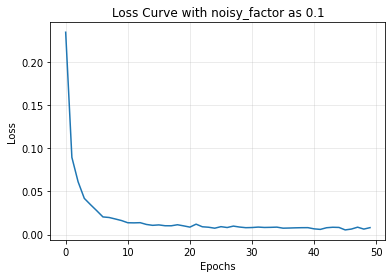

In [26]:
plt.plot(range(50),loss.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve with noisy_factor as 0.1')
plt.grid(alpha=0.3)
plt.savefig("Loss_curve with noisy_factor as 0.1.png")
plt.show()

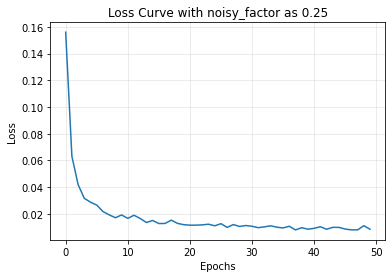

In [27]:
plt.plot(range(50),loss_2.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve with noisy_factor as 0.25')
plt.grid(alpha=0.3)
plt.savefig("Loss_curve with noisy_factor as 0.25.png")
plt.show()

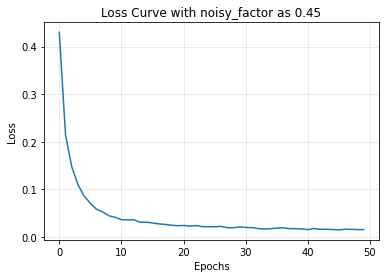

In [28]:
plt.plot(range(50),loss_3.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve with noisy_factor as 0.45')
plt.grid(alpha=0.3)
plt.savefig("Loss_curve with noisy_factor as 0.45.png")
plt.show()

In [29]:
# Calculate Test loss and Test Accuracy
print('Loss and Accuracy of model with noisy factor as 0.1:', model.evaluate(x_test_noisy, y_test))
print('Loss andAccuracy of model with noisy factor as 0.25:', model.evaluate(x_test_noisy_2, y_test))
print('Loss andAccuracy of model with noisy factor as 0.45:', model.evaluate(x_test_noisy_3, y_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.2754 - accuracy: 0.9792
Loss and Accuracy of model with noisy factor as 0.1: [0.2754444479942322, 0.979200005531311]
313/313 [==============================] - 2s 7ms/step - loss: 0.2697 - accuracy: 0.9745
Loss andAccuracy of model with noisy factor as 0.25: [0.26966381072998047, 0.9745000004768372]
313/313 [==============================] - 2s 7ms/step - loss: 0.4680 - accuracy: 0.9452
Loss andAccuracy of model with noisy factor as 0.45: [0.46803081035614014, 0.9452000260353088]


9


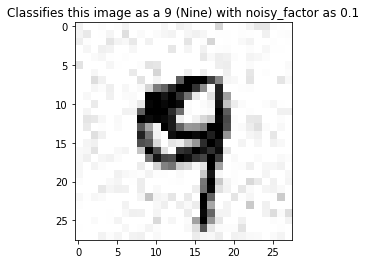

In [30]:
image_index = 4444
plt.imshow(x_test_noisy[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_noisy[image_index].reshape(1, 28, 28, 1))
plt.title('Classifies this image as a 9 (Nine) with noisy_factor as 0.1')
print(pred.argmax())


9


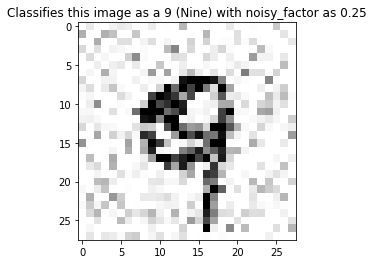

In [31]:
image_index = 4444
plt.imshow(x_test_noisy_2[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_noisy_2[image_index].reshape(1, 28, 28, 1))
plt.title('Classifies this image as a 9 (Nine) with noisy_factor as 0.25')
print(pred.argmax())

9


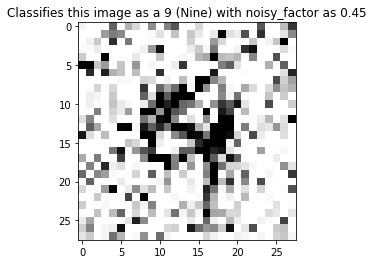

In [32]:
image_index = 4444
plt.imshow(x_test_noisy_3[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_noisy_3[image_index].reshape(1, 28, 28, 1))
plt.title('Classifies this image as a 9 (Nine) with noisy_factor as 0.45')
print(pred.argmax())